# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


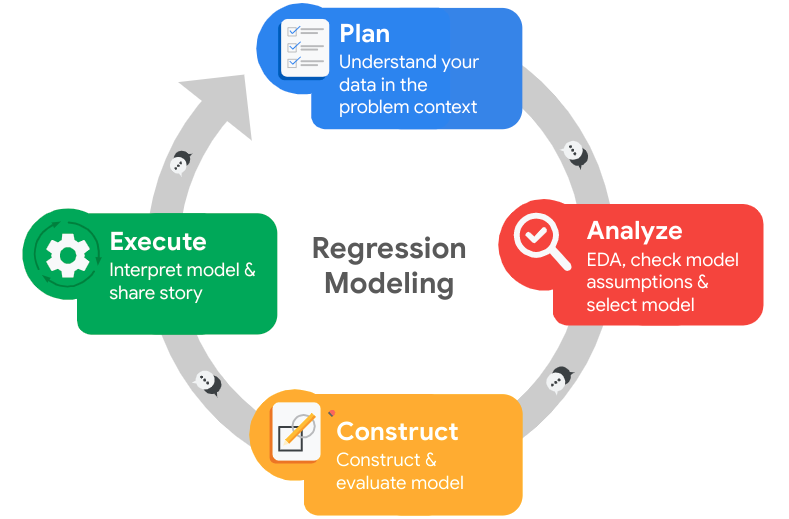

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The primary stakeholders for this project are the HR department at Salifort Motors.
2. The data is imbalanced, where only 16% of the data represents individuals who have left the company. Additionally, we have noted that the data is anonymized, and it does not contain any personal information about the employees, such as their gender, race, or age group. This anonymization is crucial for ensuring unbiased analysis.
3. During this stage, we have utilized online resources to gain insights into standard working hours in the UK. This information was essential for comparing the average working hours within the company to industry norms (https://www.citizensadvice.org.uk/work/working-hours-and-rest-breaks/check-how-many-hours-youre-working/#:~:text=You%20shouldn't%20have%20to,opt%20out%20of%20this%20limit., https://www.gov.uk/maximum-weekly-working-hours).
4. Ethical considerations are minimal in this stage, primarily due to the complete anonymization of the data. The absence of personal information about employees, along with gender, race, and age group data, ensures that privacy and bias concerns are mitigated.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0.rename(columns={'Work_accident': 'work_accident',
                    'Department':'department',
                    'average_montly_hours':'average_monthly_hours',
                    'time_spend_company':'tenure'
                   }, inplace=True)


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed

df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'tenure box plot')

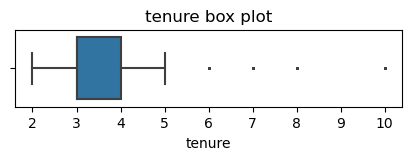

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(5,1))
sns.boxplot(x=df1['tenure'], fliersize=1)
plt.title('tenure box plot')

In [13]:
# Determine the number of rows containing outliers
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print("Number of rows in the data containing outliers in `tenure`:", len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. There are no strong correlations between the variables in the dataset, which may suggest a lower likelihood of multicollinearity.
2. The data is imbalanced. Only 16 % of the data in the dataset is for the target group (left). It is less than 20% therefore, I will not try to balance it.
3. Changed column names, calculated outliers, checked missing data and types of variables in the dataset.
4. It helps to prepare the data for modeling, select the right features, and choose the most appropriate modeling techniques. It provides a solid foundation for building predictive models that are more likely to be accurate and reliable.
5. Googled standart working hours for the UK.
6. There is no sensitive or personal data in this dataset, therefore I do not have any ethical considerations in this stage.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts()


# Get percentages of people who left vs. stayed
df1['left'].value_counts(normalize=True)


0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

I will start by looking at the satisfaction level of all employees of the company and then analyze the relationship between employee satisfaction level and turnover.

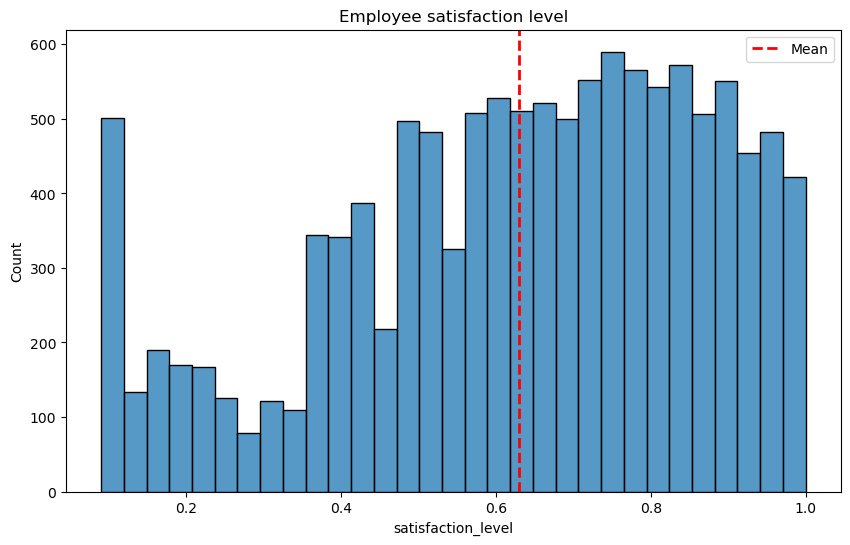

In [15]:
mean_satisfaction = df1['satisfaction_level'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(x=df1['satisfaction_level'])
plt.axvline(mean_satisfaction, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Employee satisfaction level')
plt.legend() 
plt.show()

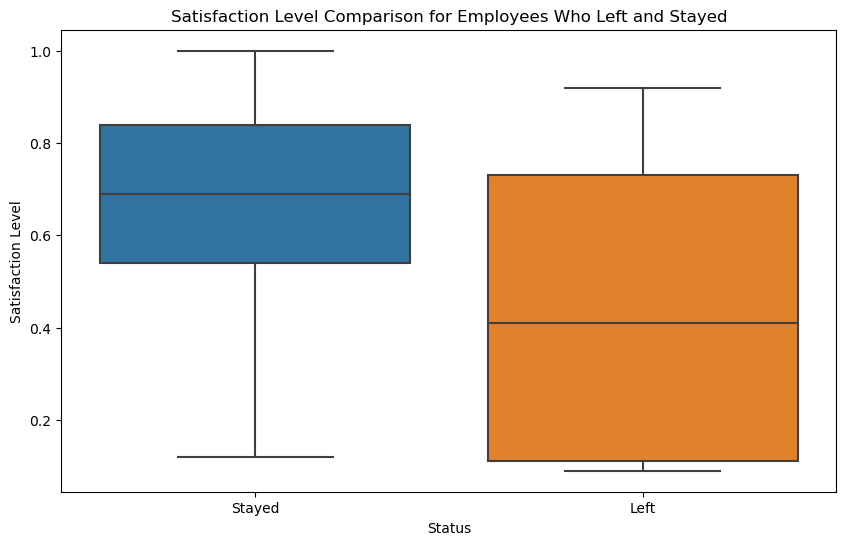

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='left', y='satisfaction_level', data=df1)
plt.title("Satisfaction Level Comparison for Employees Who Left and Stayed")
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.xlabel("Status")
plt.ylabel("Satisfaction Level")
plt.show()

From the visual representations presented earlier, it's evident that employee satisfaction exhibits a left-skewed distribution. This skewness suggests that a substantial number of employees have satisfaction levels lower than 0.61, which is generally considered low.

Notably, there is a portion of individuals who express extreme dissatisfaction with their job, assigning satisfaction scores below 0.2. As observed in the box plots, a majority of these highly dissatisfied individuals are those who chose to leave the company. However, it's important to point out that a few among this group also provided relatively high satisfaction scores, indicating some variability in their experiences.

To understand reasons behind dessatisfaction, It is worth investigating whether the average monthly hours worked, the number of projects, promotion and salary are related to turnover.

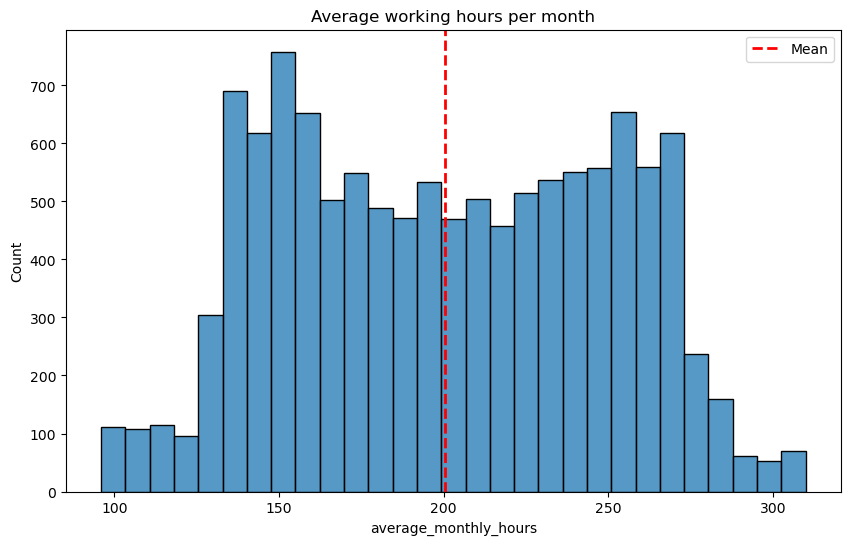

In [17]:
# Working hours

mean_satisfaction = df1['average_monthly_hours'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(x=df1['average_monthly_hours'])
plt.axvline(mean_satisfaction, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Average working hours per month')
plt.legend() 
plt.show()

Assuming a standard full-time working schedule in the UK is 35-40 hours per week, which is around 140-160 hours a month, the employees of Saliford Motors work 60-40 hours more on average. Let's look at the working hours of those who left vs those who stayed.

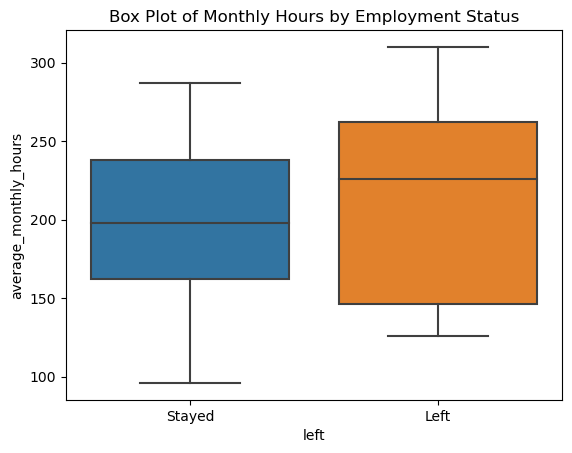

In [18]:
left_avg_hours = df1['average_monthly_hours'].mean()
stayed_avg_hours = df1['average_monthly_hours'].mean()

categories = ['Employees Who Left', 'Employees Who Stayed']

sns.boxplot(x='left', y='average_monthly_hours', data=df1)
plt.title('Box Plot of Monthly Hours by Employment Status')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()


The box plots above show that the employees who left the company worked more hours on average (~230) than those who stayed in the company (200). 
Let's see if there is a relationship between working hours and a number of projects employees had.

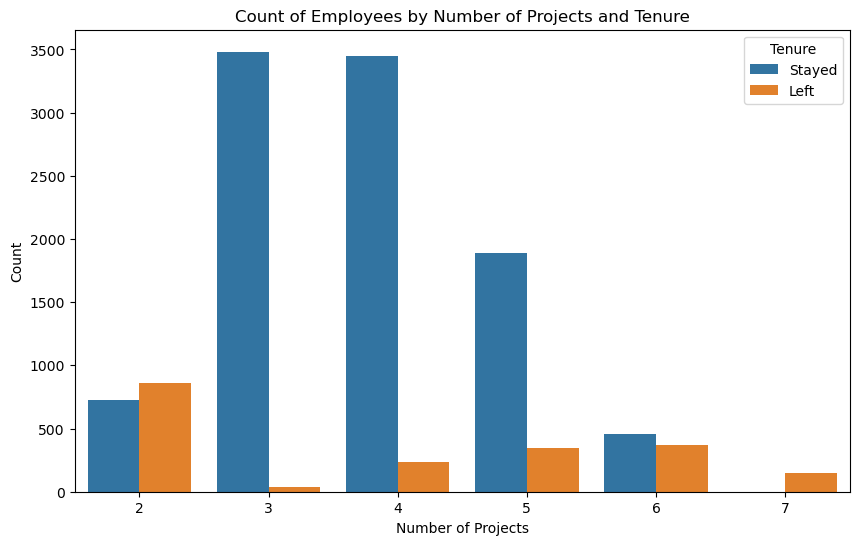

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='number_project', hue='left')

plt.title('Count of Employees by Number of Projects and Tenure')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Tenure', labels=['Stayed', 'Left'])

plt.show()

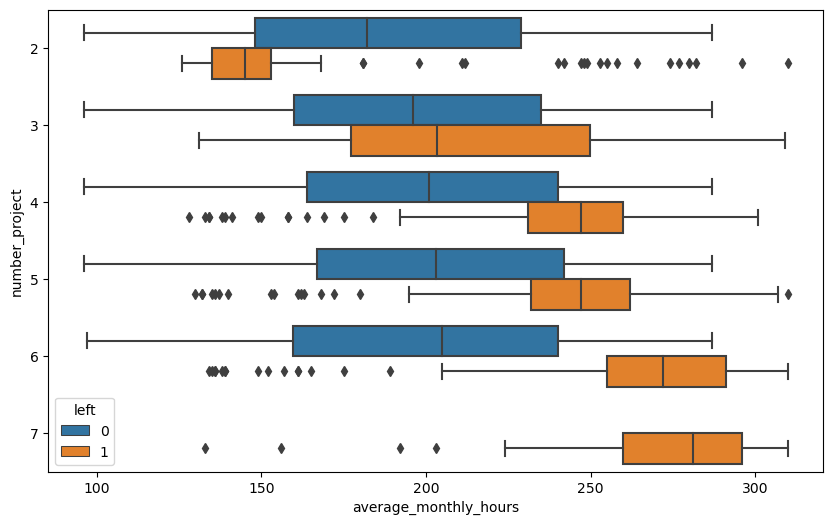

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h")
plt.show()

From the visualisations above we can see that employees departured the company had generally dedicated more time to their projects. The number of projects they undertook correlated with the duration of hours they put in. Thus, there is a distinct group of employees who were assigned to 7 projects and worked for 225-310 hours. All members of this group left the company. 

An interesting observation is that there is a group of employees who were assigned to 2 projects and worked for ~125-175 hours before leaving the company. This group stands out from the general trend of the company.
The underlying reasons for this notable distinction are not immediately apparent. There are several plausible explanations, including the possibility that these individuals left due to pressure to work extended hours or were terminated because of their inadequate project involvement, leading to poor performance or incidents. Further investigation into these factors is needed.

Before delving deeper into the analysis, it is sensible to explore whether there is a correlation between working hours and the likelihood of promotion.

Text(0.5, 1.0, 'Monthly hours by promotion')

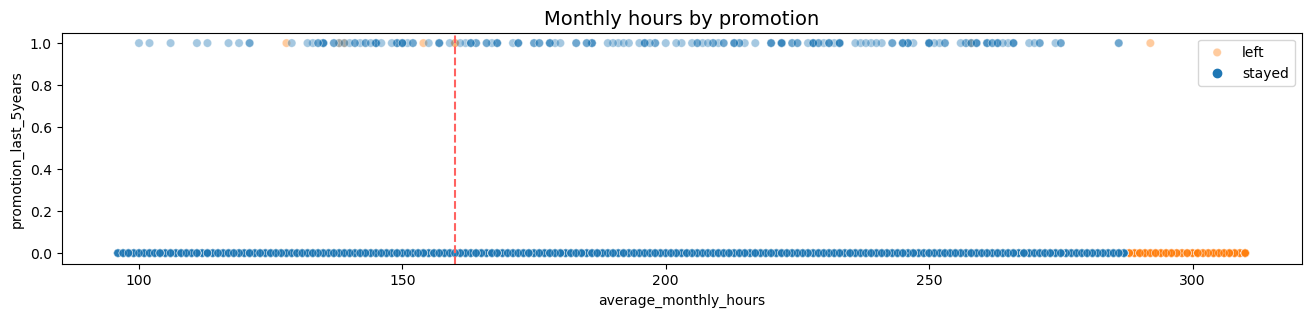

In [21]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=160, color='#ff6361', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by promotion', fontsize='14')

The scatterplot above shows that only a few people who worked overtime were promoted in the last 5 years. Only a g few of those who left the company were promoted. All of the employees who worked more than 275 hours a month left the company. 
In other words, employees who were promoted are less likely to depart.
As a next step of our analysis let us see turnover rates by department.

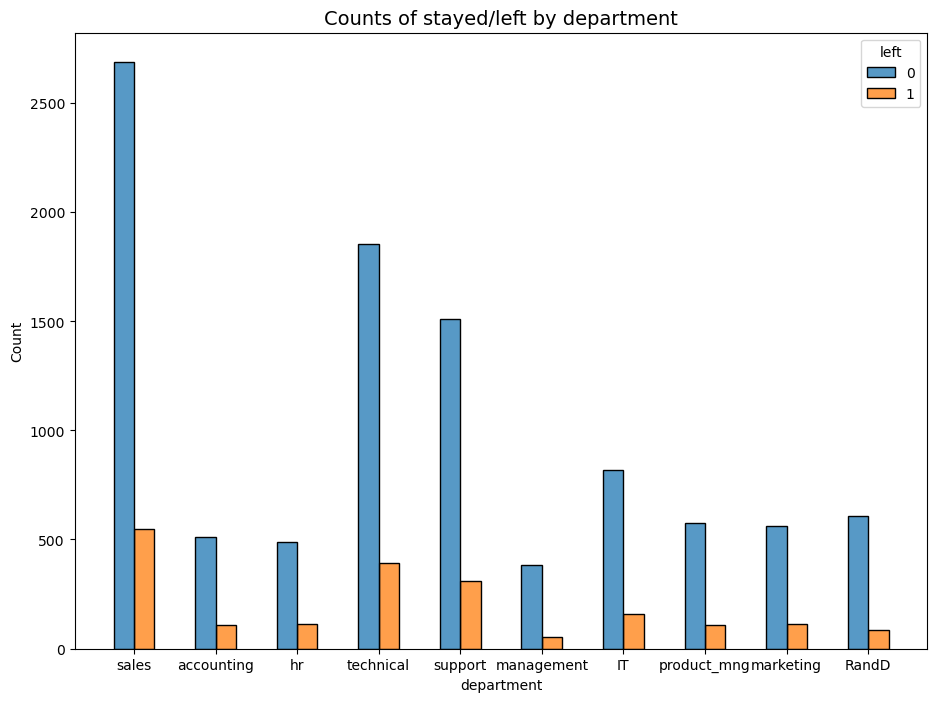

In [22]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='horizontal')
plt.title('Counts of stayed/left by department', fontsize=14);

Looks like sales department has the biggest number of departures while management departmen has the lowest. It would be interesting to see the satisfaction level for each department.

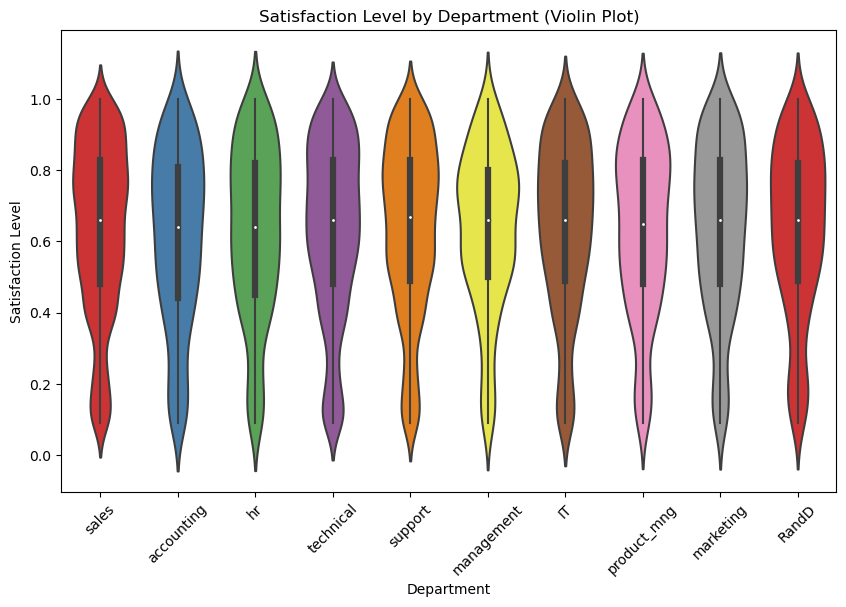

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='department', y='satisfaction_level', data=df1, palette='Set1')

plt.title('Satisfaction Level by Department (Violin Plot)')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.xticks(rotation=45) 

plt.show()

It appears that satisfaction levels are relatively consistent across all departments, with no single department significantly distinguishing itself in terms of satisfaction.

Next, we age going to investigate whether salary level is related to turnover.

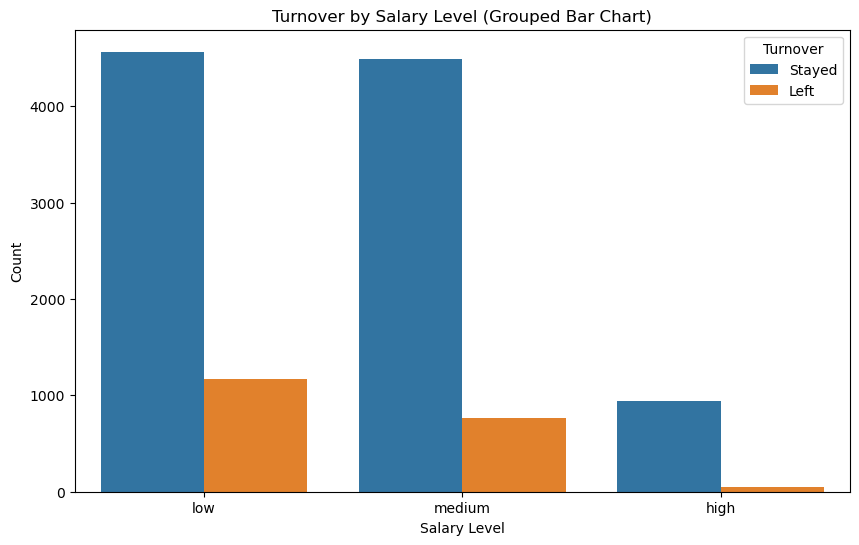

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='salary', hue='left')

plt.title('Turnover by Salary Level (Grouped Bar Chart)')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(title='Turnover', labels=['Stayed', 'Left'])

plt.show()

From the visualisation above we can see that as the salary level goes up employee departure decreases.

However, it's difficult to see the percantage of people left the company in each salary group. Let us calculate this.

In [25]:
percentage_left_by_salary = df1.groupby('salary')['left'].mean() * 100
percentage_left_by_salary = percentage_left_by_salary.round(2)
percentage_left_by_salary

salary
high       4.85
low       20.45
medium    14.62
Name: left, dtype: float64

In [26]:
percentage_salary_left = df1[df1['left'] == 1]['salary'].value_counts(normalize=True) * 100

percentage_salary_left = percentage_salary_left.round(2)

print(percentage_salary_left)

low       58.97
medium    38.62
high       2.41
Name: salary, dtype: float64


The calculations above show that the highest percentage of those who left were employess from low salary group. With the increase in salary, the percentage of employess leaving the company decreases.

As a next step let us investigate if there is a relationship between an employee's tenure with the company and turnover. New employees and long-serving employees may have different reasons for leaving.

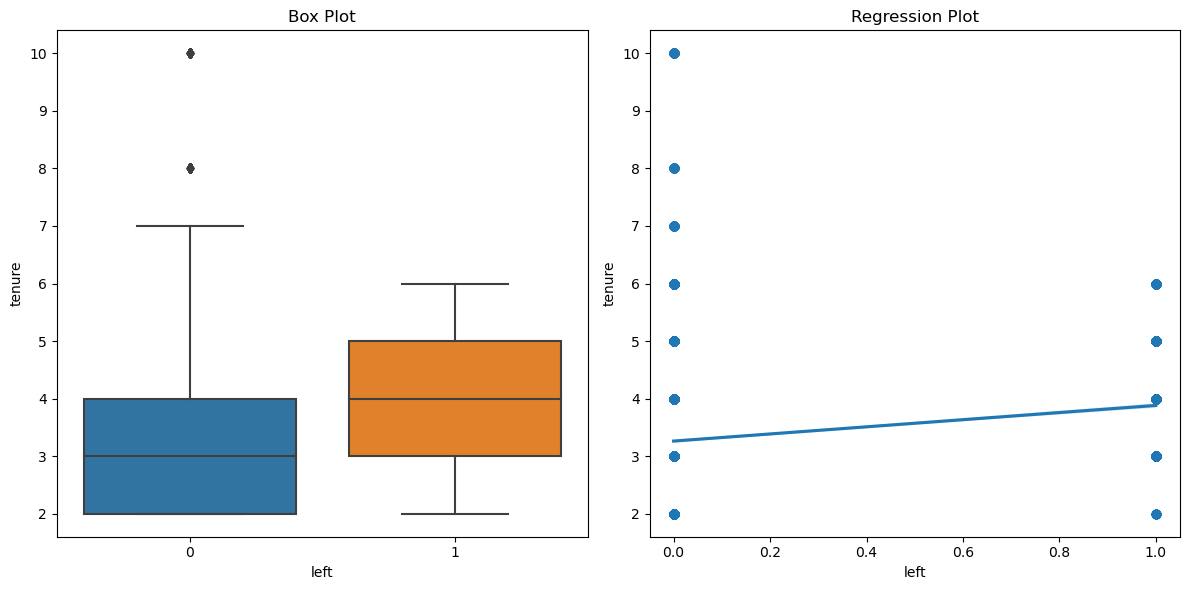

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='left', y='tenure', data=df1, ax=axes[0])
axes[0].set_title('Box Plot')

sns.regplot(x='left', y='tenure', data=df1, ax=axes[1])
axes[1].set_title('Regression Plot')

plt.tight_layout() 
plt.show()

Looks like employess start leaving the company after they reach 4 years of employment. 

Next, let us see work performance and wotking hours.

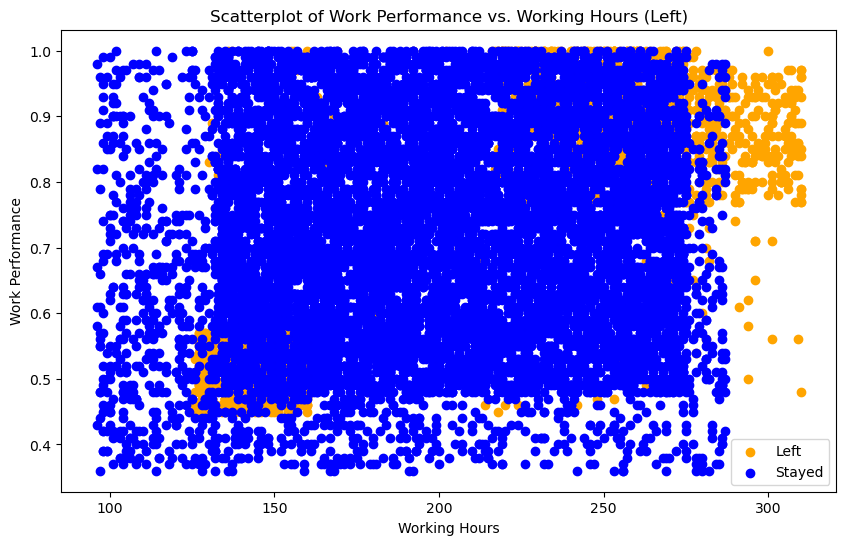

In [28]:
left_df = df1[df1['left'] == 1]
stayed_df = df1[df1['left'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(left_df['average_monthly_hours'], left_df['last_evaluation'], c='orange', label='Left')
plt.xlabel('Working Hours')
plt.ylabel('Work Performance')
plt.title('Scatterplot of Work Performance vs. Working Hours (Left)')

plt.scatter(stayed_df['average_monthly_hours'], stayed_df['last_evaluation'], c='blue', label='Stayed')
plt.legend()

plt.show()

In the scatterplot provided, two groups are particularly noticeable. First, there are the employees who left the company and worked approximately 230-320 hours per month, displaying a high performance score ranging from 0.8 to 1. Additionally, there are employees who left the company, worked around 120-160 hours a month, and exhibited relatively low performance scores, ranging from 0.45 to 0.57. These findings align with the earlier hypothesis that this latter group of employees might have been terminated, and this interpretation appears to be more substantiated now.

Let us see if there is a relationship between work accident and departure.

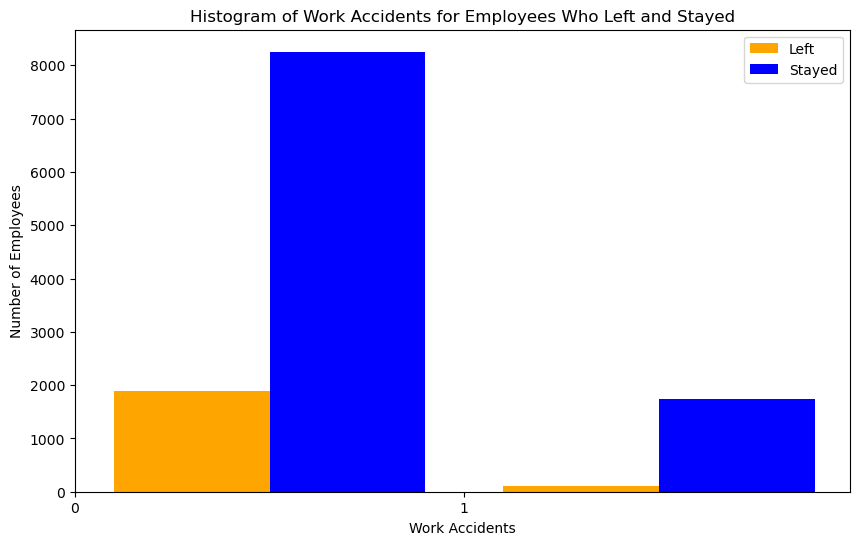

In [29]:
plt.figure(figsize=(10, 6))

plt.hist([left_df['work_accident'], stayed_df['work_accident']], bins=[0, 1, 2], color=['orange', 'blue'], label=['Left', 'Stayed'])
plt.xlabel('Work Accidents')
plt.ylabel('Number of Employees')
plt.title('Histogram of Work Accidents for Employees Who Left and Stayed')
plt.xticks([0, 1])
plt.legend()

plt.show()

Based on the information provided by the histogram, it appears improbable that work accidents played a significant role in employee departures.

And finally, let us create a heatmap to see the relationships between all variables in the dataset.

C:\Users\kurak\AppData\Local\Temp\ipykernel_13132\210848917.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


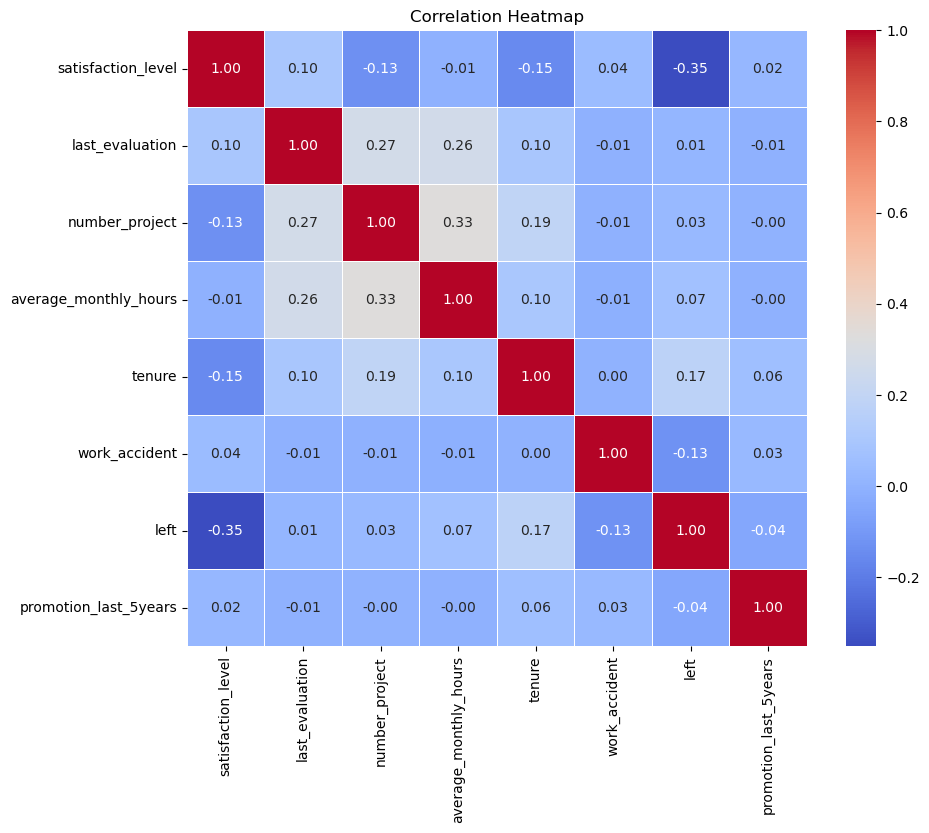

In [30]:
correlation_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

The heatmap provides clear insights into the data. It reveals that there are no strong correlations between the variables in the dataset. However, we can see some negative correlations between satisfaction and the number of projects, satisfaction and tenure, as well as satisfaction and working hours. Another notable finding is the negative correlation between satisfaction and the number of employees who left the company. Additionally, the heatmap indicates a positive correlation between the number of projects and working hours as well as performance(last_evaluation column) and working hours and projects.
Columns with categorical variables are not included in the heatmap(salary and department).

### Insights

It seems that employee departures from the company are linked to ineffective management practices, characterized by extended working hours, a high project load, and generally lower job satisfaction. Working long hours without commensurate promotions or favorable evaluation scores can be demoralizing. It is evident that a significant portion of the workforce within the company may be experiencing burnout. Additionally, it appears that employees who have been with the company for more than six years are less inclined to resign.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

My goal is to predict employee's turnover. It a categorical variable (stay or leave). This involves binary classification with outcome variable 1 (left) or 0 (stayed).

### Identify the types of models most appropriate for this task.

Since the variable is categorical, I would like to build a Logistic Regression model first and see the result. I might also build a Rendom Forest Model and see which one is more accurate.

### Modeling

Add as many cells as you need to conduct the modeling process.

I will start by getting dummies for categorical variables.

In [31]:
df_enc = df1.copy()

df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes )
df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Logistic Regression models are sensitive to outliers, therefore I'm going to exclude them from the model.

In [32]:
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
y = df_logreg['left']
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [34]:
X = df_logreg.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [36]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [37]:
y_pred = log_clf.predict(X_test)

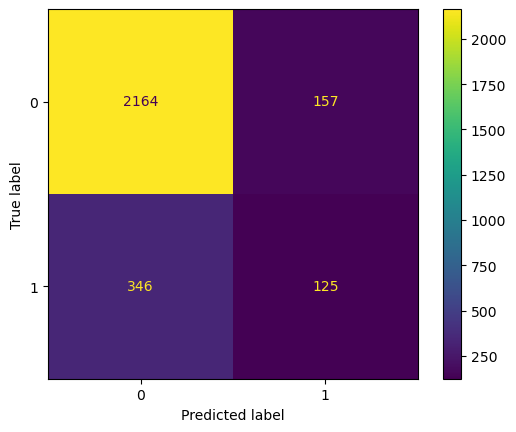

In [38]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)
log_disp.plot(values_format='')

plt.show()

True negatives: 2164 is the number of people who did not leave that the model accurately predicted did not leave.

False positives: 157  is the number of people who did not leave the model inaccurately predicted as leaving.

False negatives: 346 is the number of people who left that the model inaccurately predicted did not leave

True positives: 125 is the number of people who left the model accurately predicted as leaving

In [39]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [40]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.27      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report presented above indicates that the logistic regression model attained a weighted average precision of 80%, a weighted average recall of 83%, and a weighted average F1-score of 80%, along with an overall accuracy of 83%. Nevertheless, when prioritizing the prediction of employees who depart, these metrics exhibit a notable decrease in performance. Consequently, I intend to construct a Random Forest Model to assess whether it can provide more accurate predictions in this critical aspect.

In [41]:
import pickle as pkl
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

As Random Forest is less less sensistive to outliers than Logistic Regression model, I'm not going to exclude them.

In [42]:
df_rf = df_enc.copy()
df_rf.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
y = df_rf["left"]
X = df_rf.drop("left", axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [45]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [46]:
%%time

rf1.fit(X_train, y_train)

CPU times: total: 29min 45s
Wall time: 42min 26s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

In [47]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [48]:
rf1.best_score_

0.9806923046564571

In [49]:
rf_opt = RandomForestClassifier(n_estimators = 300, max_depth = 5, 
                                min_samples_leaf = 3, min_samples_split = 2,
                                max_features=1.0, max_samples = 1.0, random_state = 0)

In [50]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=1.0,
                       min_samples_leaf=3, n_estimators=300, random_state=0)

In [51]:
y_pred = rf_opt.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.98
Precision: 0.96
Recall: 0.93
F1-Score: 0.94


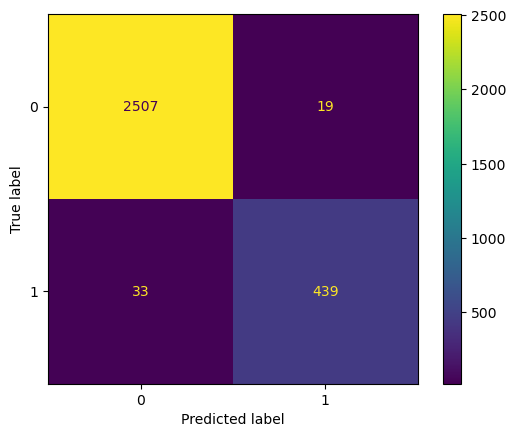

In [53]:
cm = confusion_matrix(y_test, y_pred, labels=rf1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)
disp.plot(values_format='');

True negatives: 2507 is the number of people who did not leave that the model accurately predicted did not leave.

False positives: 19 is the number of people who did not leave the model inaccurately predicted as leaving.

False negatives: 33 is the number of people who left that the model inaccurately predicted did not leave.

True positives: 439 is the number of people who left the model accurately predicted as leaving.

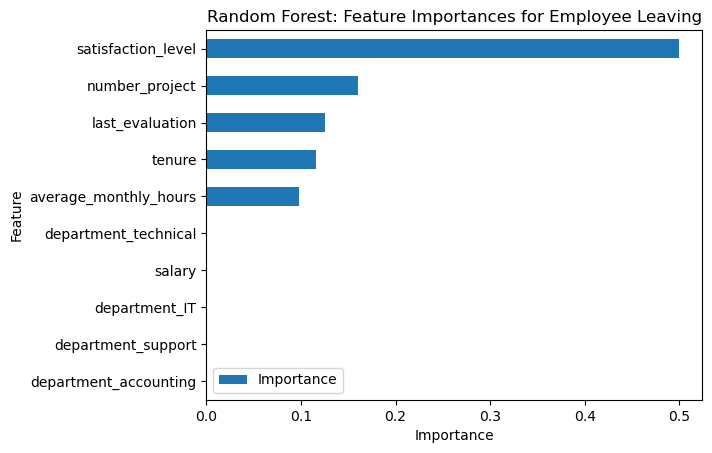

In [54]:
feat_impt = rf1.best_estimator_.feature_importances_

ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]
feat = X.columns[ind]
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

In [55]:
df1.to_csv('HR_capstone_dataset_clean.csv', index=False)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set. However, when prioritizing the prediction of employees who depart, these metrics exhibit a weak performance with 44% precision, 27% recall and 33% F1 score. Therefore a Random Forest model was built which outperformed the logistic regression model with 98% accuracy, 96% precision, 93% recall and 94% F1-Score.
Additionally, top 5 features related to employee departure were identified. 

### Conclusion, Recommendations, Next Steps

The findings from the analysis state that there is an issue of employee overwork within the company. The following recommendations to the management could be made to emprove impolyee retention:

1. Implement a limit on the number of projects assigned to each employee.
2. Ensure equitable distribution of projects among all employees.
3. Avoid requiring employees to work extended hours.
4. Introduce incentives for overtime work.
5. Assess the feasibility of promoting employees who have served a minimum of 3 years with the company.
6. Revamp the performance evaluation system to base it on contributions rather than working hours.